# Importing Libraries

In [22]:
#Operating system
import os

#Linear Algebra (Numerical Calculation)
import numpy as np

# Data Processing
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data Pre-processing
from sklearn.preprocessing import LabelEncoder

#Feature Selection
from sklearn.feature_selection import RFECV

#Algorithms 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

#Accuracy Measurement
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

#Ignore Warnings
import warnings

warnings.filterwarnings('ignore')




# Import Data

In [23]:
train_df = pd.read_csv('/home/alienware/Desktop/kaggle_Projects/Titanic/Dataset/train.csv')
test_df = pd.read_csv('/home/alienware/Desktop/kaggle_Projects/Titanic/Dataset/test.csv')

# Data Exploration

There are 891 training set examples and 11 features + target variable(survived). Futhermore, there are 5 integer, 2 floats and 5 objects features.

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [26]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [28]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [29]:
train_df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dantcheff, Mr. Ristiu",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Detailed analysis of missing data

In [30]:
total = train_df.isnull().sum().sort_values(ascending=False)
total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [31]:
percentile_1 = train_df.isnull().sum() / train_df.isnull().count() * 100
percentile = (round(percentile_1 , 1)).sort_values(ascending = False)
missing_values = pd.concat([total , percentile] , axis=1 , keys=['Total' , 'Percentile %'])
missing_values.head()

,Total,Percentile %
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


As we noticed that there are 77% in cabin column , 19% in Age and 2% in Embarked column missing values. The cabin feature needs further investigation so, we need to drop this column.

In [32]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### What features contribute to a High Survival Rate?

According to my perscpective, every columns are correlated with a high survival rate except 'PassengerId', 'Name' and 'Ticket'.

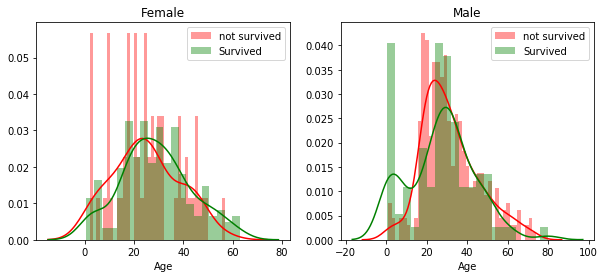

In [33]:
women = train_df[train_df['Sex'] == 'female']
men =  train_df[train_df['Sex'] == 'male']
fig, axis = plt.subplots(nrows=1 , ncols=2,figsize=(10,4))

Survived = 'Survived'
not_survived = 'not survived'

ax = sns.distplot(women[women['Survived'] == 0 ].Age.dropna() , bins=40, 
                 label = not_survived, ax = axis[0] , color = 'r' )
ax = sns.distplot(women[women['Survived'] == 1 ].Age.dropna() , bins=20, 
                 label = Survived, ax = axis[0] ,  color = 'g')
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived'] == 0 ].Age.dropna() , bins=40, 
                 label = not_survived, ax = axis[1] , kde=True , color = 'r')
ax = sns.distplot(men[men['Survived'] == 1 ].Age.dropna() , bins=20, 
                 label = Survived, ax = axis[1] , kde=True , color = 'g')
ax.legend()
_ = ax.set_title('Male')




Men has higher survival probability age between 18 to 35 years old and female has 14 to 40 years ols as compared to low survival rate men has age between 5 to 18

In [34]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


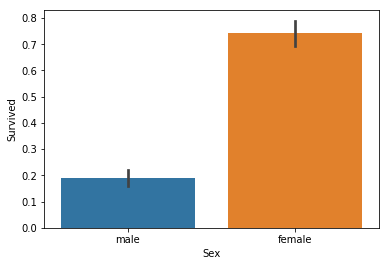

In [35]:
sns.barplot(x = 'Sex' , y = 'Survived' , data=train_df)
plt.show()

Proportion rate of male is 1/3 as compared to the female (2/3). So, there is 20% survival rate of male as compared to female.

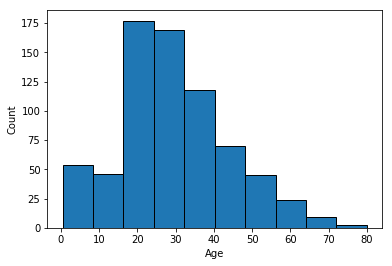

In [36]:
plt.hist(train_df.Age , edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

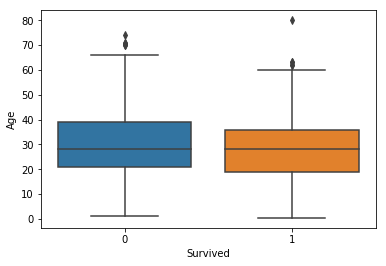

In [37]:
sns.boxplot(x = 'Survived' , y ='Age' , data=train_df)
plt.show()

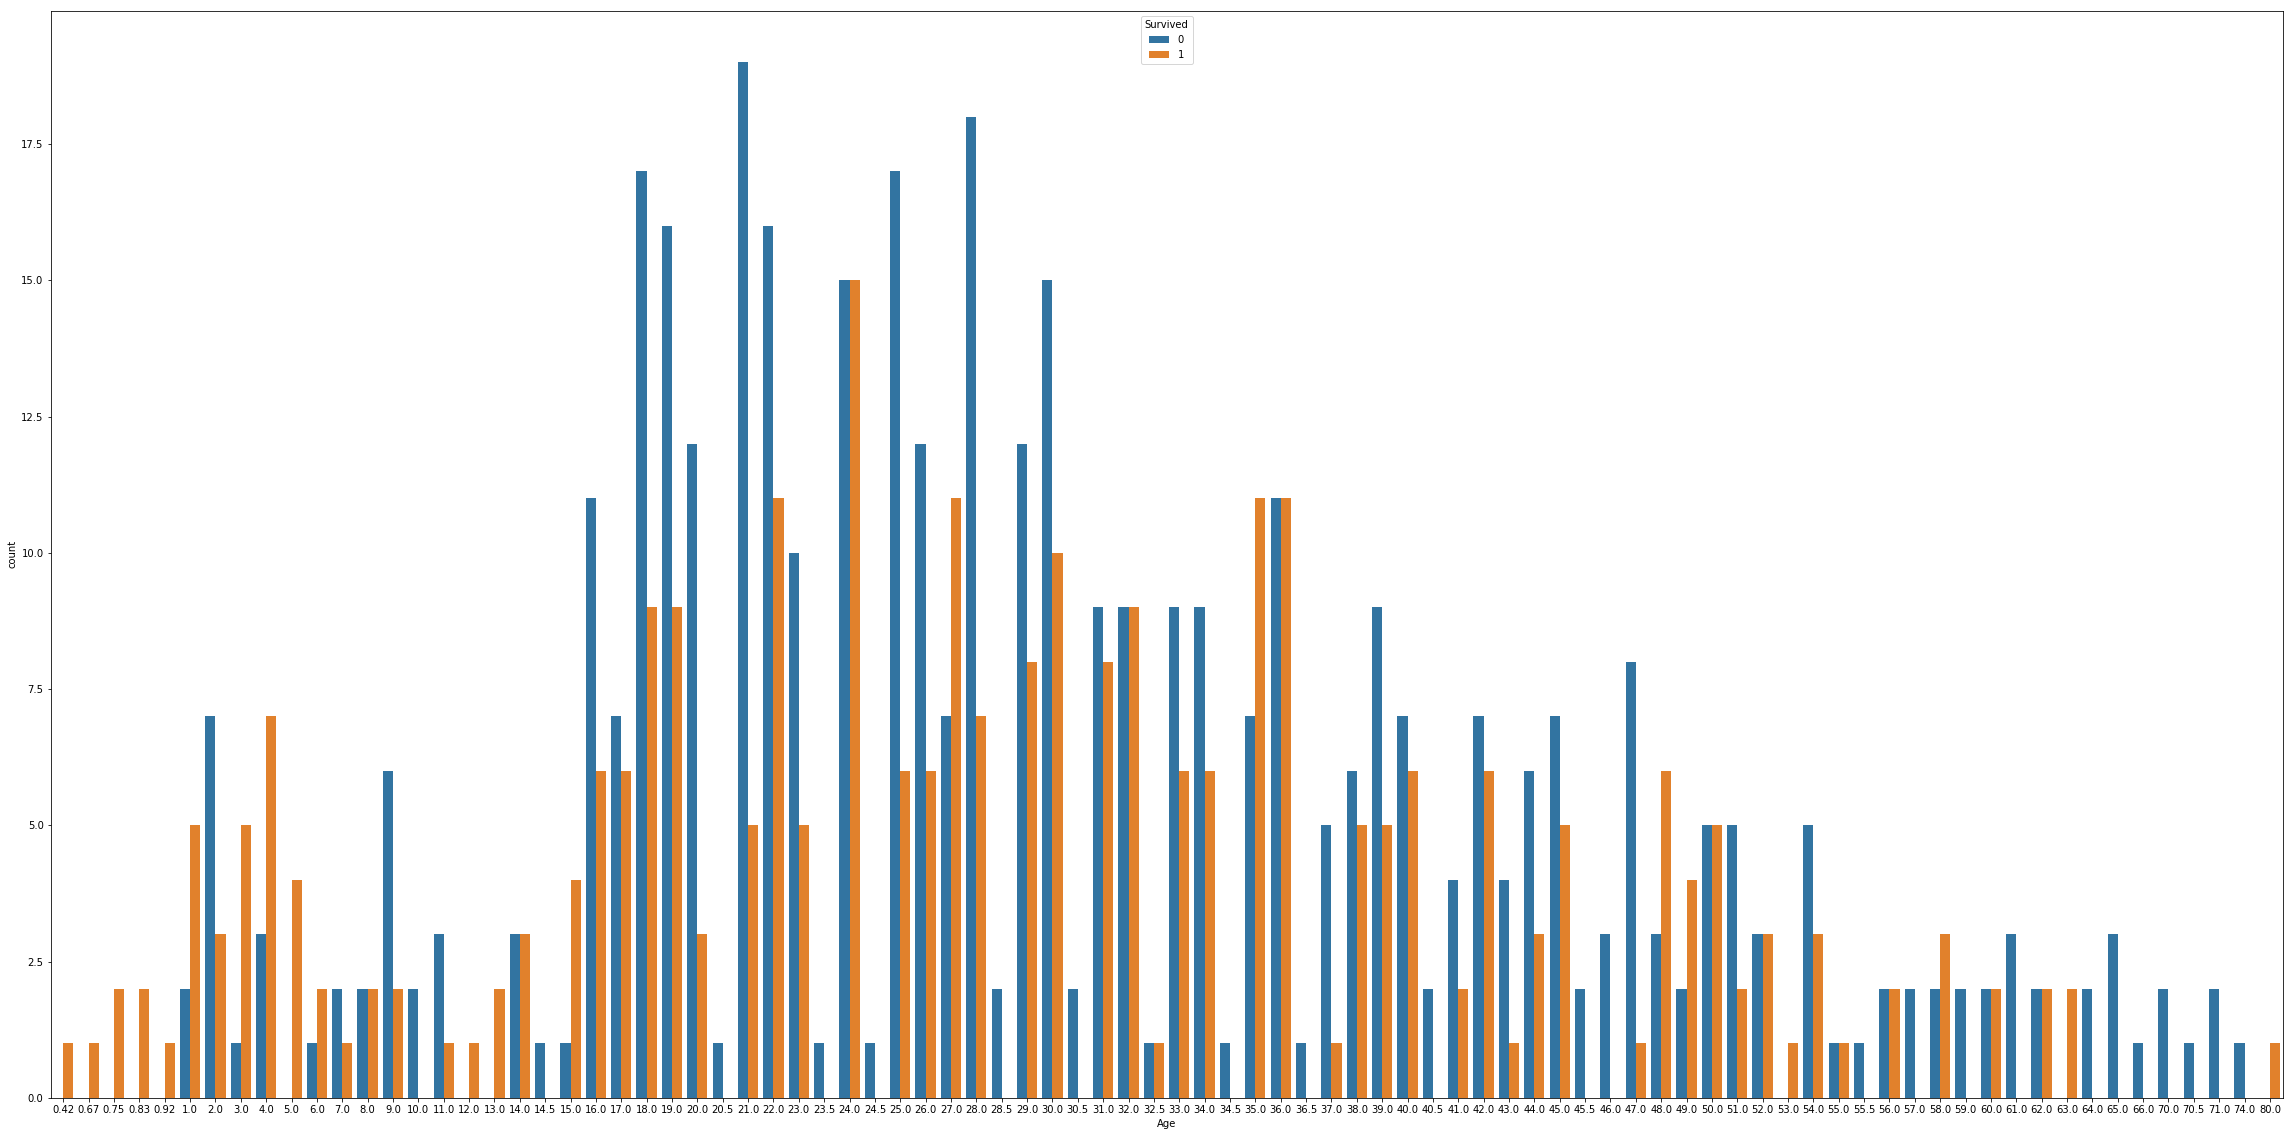

In [38]:
plt.figure(figsize=(40,20))
sns.countplot(x = 'Age' , hue='Survived', data=train_df)


### Embarked , Pclass and Sex

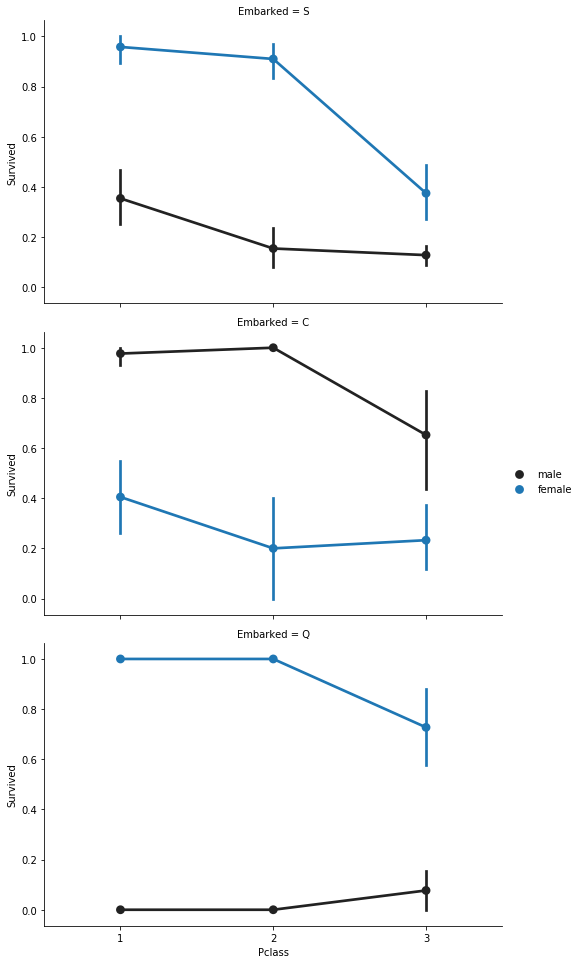

In [39]:
FacetGrid_view = sns.FacetGrid(train_df , row='Embarked' , size=4.5, aspect=1.6)
FacetGrid_view.map(sns.pointplot , 'Pclass' , 'Survived' , 'Sex')
FacetGrid_view.add_legend()

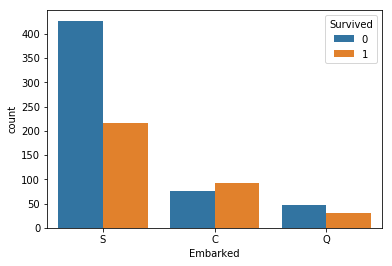

In [40]:
sns.countplot(x = 'Embarked' , hue='Survived' , data=train_df)
plt.show()

In [41]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


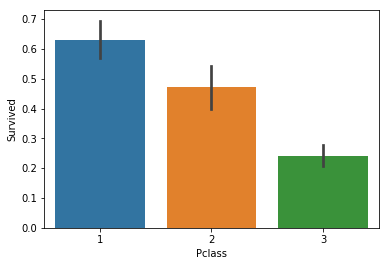

In [42]:
sns.barplot(x = 'Pclass' , y='Survived' , data=train_df)

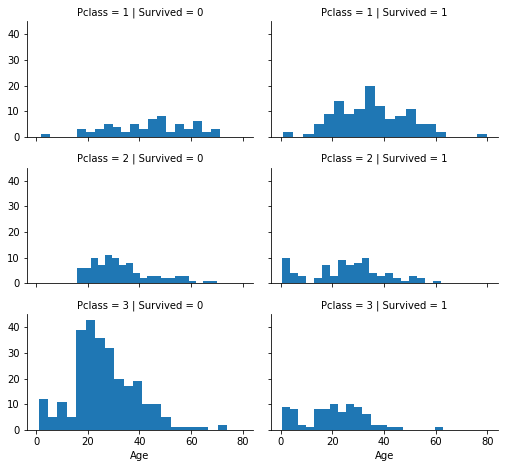

In [43]:
grid_view = sns.FacetGrid(train_df, col='Survived' , row='Pclass' , 
                         size = 2.2, aspect=1.6)

grid_view.map(plt.hist , 'Age' , bins=20 )
grid_view.add_legend()

### SibSp and Parch

In [44]:
# # of Siblings (SibSP)
# # of parents / Children aboard on the titanic

data = [train_df , test_df]

for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0 , 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0 , 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [45]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


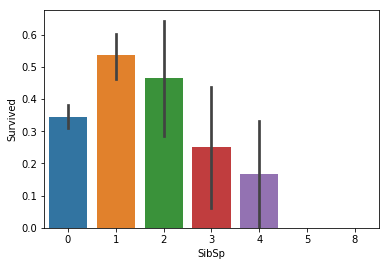

In [46]:
sns.barplot(x = 'SibSp' , y = 'Survived' , data=train_df)

In [47]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


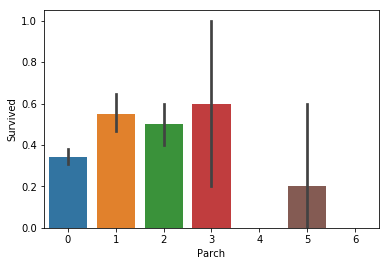

In [48]:
sns.barplot(x = 'Parch' , y='Survived' , data=train_df)

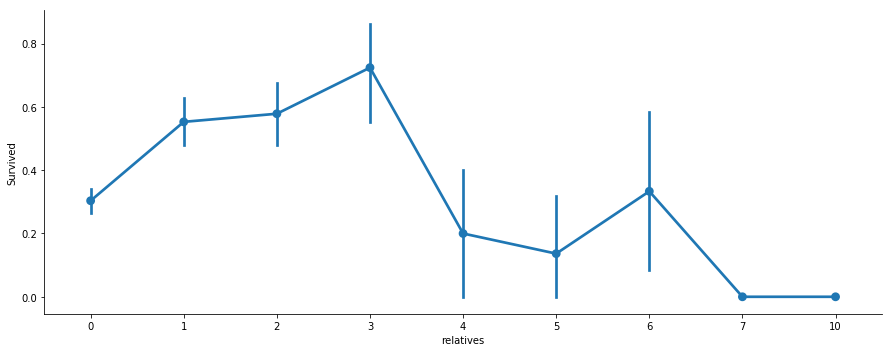

In [49]:
factor_plot = sns.factorplot('relatives' , 'Survived',
                            data=train_df , aspect=2.5)

It shows that the probability of survival rate is high if passenegers travels with 1 to 3 realtives, but lower if they have less than 1 or more than 3 realtives.

### Data Pre-Processing

As we know that there are multiple missing values in different columns. Likewise, we have '687' in 'cabin', '2' in 'Embarked' and '177' in 'Age'. we need to perform feature engineeing to tackle with missing data and add some random values 

### Age

In [50]:
data = [train_df , test_df]
for dataset in data:
    mean = train_df['Age'].mean()
    std = test_df['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    
    #Find some random_numbers between mean, std and is_null
    
    random_numbers = np.random.randint(mean - std , mean + std, size = is_null)
    
    #Fill the NAN values in Age column with random generated values
    
    age_copy = dataset['Age'].copy()
    
    age_copy[np.isnan(age_copy)] = random_numbers
    dataset['Age'] = age_copy
    dataset['Age'] = train_df['Age']
    
train_df['Age'].isnull().sum()

0

### Emabrked

In [51]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [52]:
common_value = 'S'
data = [train_df , test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [53]:
train_df['Embarked'].isnull().sum()

0

### Converting Features

In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
relatives      891 non-null int64
not_alone      891 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 97.5+ KB


As we see in above mentioned detail, we have 1 float and 5 categorical variables. First we drop the 'cabin' column and then transom them into numerical values.

### Fare

Converting Fare(float64) data type into int64  'astype()' function

In [55]:
data = [train_df , test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
train_df['Fare'].dtypes

dtype('int64')

### Name

Extract the Titles from Name column and build a new feature

In [56]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,NaN,S,0,1


In [57]:
train_df.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [58]:
for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [59]:
titles = {"Mr" : 1 , "Miss" : 2, "Mrs" : 3, "Master" : 4, "Rare" : 5}
for dataset in data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    dataset['Title'] = dataset['Title'].map(titles)
    
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,1,0.156673
1,2,0.702703
2,3,0.793651
3,4,0.575000
4,5,0.347826


In [60]:
train_df = train_df = train_df.drop(['Name'] , axis=1)
test_df = test_df = test_df.drop(['Name'] ,  axis=1)

In [61]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Title
0,892,3,male,22.0,0,0,330911,7,NaN,Q,0,1,1
1,893,3,female,38.0,1,0,363272,7,NaN,S,1,0,3
2,894,2,male,26.0,0,0,240276,9,NaN,Q,0,1,1
3,895,3,male,35.0,0,0,315154,8,NaN,S,0,1,1
4,896,3,female,35.0,1,1,3101298,12,NaN,S,2,0,3


In [62]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7,NaN,S,1,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71,C85,C,1,0,3
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7,NaN,S,0,1,2
3,4,1,1,female,35.0,1,0,113803,53,C123,S,1,0,3
4,5,0,3,male,35.0,0,0,373450,8,NaN,S,0,1,1


### Sex

Convert 'Sex' Feature into numeric

In [63]:
data = [train_df , test_df]
gender = {
    "male" : 0,
    "female" : 1
}

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender)

In [64]:
train_df.Sex.head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

### Ticket

In [65]:
train_df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

Ticket feature have '681' unique tickets. So, it will be tricky to convert them into useful categories. So, will drop the Ticket attribute

# Creating Categories

In [66]:
data = [train_df , test_df]

for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <=18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <=22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <=27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <=33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <=40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <=66), 'Age'] = 6
    dataset.loc[dataset['Age'] > 66, 'Age'] = 6
    

In [67]:
train_df['Age'].value_counts()

4    163
6    160
5    154
3    132
2    107
1    107
0     68
Name: Age, dtype: int64

In [68]:
train_df =  train_df.drop(['PassengerId' , "Ticket" , 'Cabin' , 'relatives' , 'Parch', 'SibSp'] , axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,not_alone,Title
0,0,3,0,2,7,S,0,1
1,1,1,1,5,71,C,0,3
2,1,3,1,3,7,S,1,2
3,1,1,1,5,53,S,0,3
4,0,3,0,5,8,S,1,1


In [69]:
test_df = test_df.drop(['PassengerId' , "Ticket" , 'Cabin' , 'relatives' , 'Parch', 'SibSp'] , axis=1)

In [70]:
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,not_alone,Title
0,3,0,2,7,Q,1,1
1,3,1,5,7,S,0,3
2,2,0,3,9,Q,1,1
3,3,0,5,8,S,1,1
4,3,1,5,12,S,0,3


In [71]:
data = [train_df, test_df]
for dataset in data:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454) , 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare'] = 4
    dataset.loc[(dataset['Fare'] > 250), 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [72]:
train_df['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

In [73]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,not_alone,Title
0,0,3,0,2,0,S,0,1
1,1,1,1,5,3,C,0,3
2,1,3,1,3,0,S,1,2
3,1,1,1,5,3,S,0,3
4,0,3,0,5,1,S,1,1


### Convert Embarked into Numeric Data

In [74]:
Embarked_ports = {"S" : 0, "C" : 1, "Q" : 2}
data = [train_df , test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(Embarked_ports) 
    

In [75]:
train_df['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [76]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,not_alone,Title
0,0,3,0,2,0,0,0,1
1,1,1,1,5,3,1,0,3
2,1,3,1,3,0,0,1,2
3,1,1,1,5,3,0,0,3
4,0,3,0,5,1,0,1,1


### Creating New Feature

Age times class, Fare per person ?

In [77]:
data = [train_df, test_df]

for dataset in data:
    dataset['Age_class'] = dataset['Age'] * dataset['Pclass']

In [78]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,not_alone,Title,Age_class
0,0,3,0,2,0,0,0,1,6
1,1,1,1,5,3,1,0,3,5
2,1,3,1,3,0,0,1,2,9
3,1,1,1,5,3,0,0,3,5
4,0,3,0,5,1,0,1,1,15


### Machine Learning Model Bulidings

In [79]:
#Labeling

X_train = train_df.drop("Survived" , axis=1)
X_test = test_df
Y_train = train_df['Survived']

In [80]:
X_train.shape , Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [81]:
#Logistic Regression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

Y_pred = log_reg.predict(X_test)

acc_log = round(log_reg.score(X_train, Y_train)*100 , 2)
print("Accuracy of Logistic Regression: ", acc_log)

Accuracy of Logistic Regression:  80.81


### Find Correlation between the columns

We have to use Logistic Regression to validate our assumptions and decision for creating features and this can be done by calculating the correlation based on the decision function.

In [82]:
corr_df = pd.DataFrame(train_df.columns.delete(0))
corr_df.columns = ['Features']
corr_df['Correlation'] = pd.Series(log_reg.coef_[0])

corr_df.sort_values(by='Correlation' , ascending=False)

,Features,Correlation
1,Sex,2.198905
6,Title,0.397246
4,Embarked,0.304048
5,not_alone,0.208400
3,Fare,0.012287
7,Age_class,-0.003878
2,Age,-0.150641
0,Pclass,-1.026299


As we see , positive coffienet increase thus the probability increase and vise versa. Sex feature have the higest positive feature, sex value increase highest chance of probability survival rate is increase.

In [83]:
# Perceptron

# - Supervised Learning Algorithm used for binary classification
# - linear classifier
 
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train , Y_train) *100 , 2)

print("Accuracy of Perceptron: ", acc_perceptron)

Accuracy of Perceptron:  75.2


In [84]:
# Support Vector Machines
""" 
Non-Probabilistic binary linear classifier
 
    """
svc = SVC()
    
svc.fit(X_train , Y_train)

Y_pred = svc.predict(X_test)
    
acc_svc = round(svc.score(X_train , Y_train)*100 , 2)
    
print("Accuracy of Support_Vector_Machine: ", acc_svc) 

Accuracy of Support_Vector_Machine:  83.95


In [85]:
# K-Nearest Neighbors

"""
- Bascially used in Pattern Recognition
- Non-Parametric method used for classification and regression

"""

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train)*100, 2)
print("Accuracy of K-Nearest Neighbors: ", acc_knn)

Accuracy of K-Nearest Neighbors:  86.2


In [86]:
# Stochastic Gradient Descent

sgd = SGDClassifier(max_iter=5)
sgd.fit(X_train, Y_train)

Y_pred = sgd.predict(X_test)

acc_sgd = round(sgd.score(X_train, Y_train)*100 , 2)

print("Accuracy of Stochastic Gradient Descent: ", acc_sgd)

Accuracy of Stochastic Gradient Descent:  78.23


In [87]:
#Linear SVC

linear_SVC = LinearSVC()
linear_SVC.fit(X_train, Y_train)

Y_pred = linear_SVC.predict(X_test)

acc_linear_SVC = round(linear_SVC.score(X_train, Y_train)*100, 2)

print("Accuracy of Linear_SVC: ", acc_linear_SVC)

Accuracy of Linear_SVC:  79.46


In [88]:
# Decision Tree

"""
- Predictive model which maps features
- Tree Structure (Leaves represent Class labels & Branches represent conjuction of feature)
"""

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100, 2)

print("Accuracy of Decision Tree Classifier: ", acc_decision_tree)

Accuracy of Decision Tree Classifier:  89.79


In [89]:
# Random Forest

"""
 - Ensemble learning method for classification and Regression
 - It operate by constructing a multitude of decision tree(n_estimator=100) at training time
"""

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred =  random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, Y_train)*100, 2)

print("Accuracy of Random_Forest: ", acc_random_forest)

Accuracy of Random_Forest:  89.79


In [90]:
#Gaussian Naive Bayes

"""
- Probabilistic Classifier based on applying Bayes Theorem
- Independence assumption between the features
"""

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train)*100, 2)

print("Accuracy of Gaussion: ", acc_gaussian)

Accuracy of Gaussion:  76.43


### Model Evaluation

In [91]:
models = pd.DataFrame({
    'Model' : [
        'Logistic Regression', 'Perceptron', 'Support Vector Machine',
        'Random Forest', 'Naive Bayes', 'Linear SVC',
        'Decision Tree', 'Stochastic Gradient Descent', 'KNN'],
    'Score' : [ acc_log, acc_perceptron, acc_svc,
               acc_random_forest, acc_gaussian, acc_linear_SVC,
               acc_decision_tree, acc_sgd, acc_knn
        
    ]
    
})

models.sort_values(by='Score' , ascending=False)

,Model,Score
3,Random Forest,89.79
6,Decision Tree,89.79
8,KNN,86.20
2,Support Vector Machine,83.95
0,Logistic Regression,80.81
5,Linear SVC,79.46
7,Stochastic Gradient Descent,78.23
4,Naive Bayes,76.43
1,Perceptron,75.20


Random Forest and Decision Tree have same score, but we chosse Random Forest because Decision Tree habit of overfitting.

Lets check , how random_forest performs when we used cross-validation

### K-Fold Cross Validation

In [92]:
"""
- Randomly splits the training data into k subsets called folds
- Lets split our model into 4 folds (k=4)
"""

from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring="accuracy")

print("Scores: ", scores)
print("Mean: ", scores.mean())
print("Standard Derivation: ", scores.std())

Scores:  [0.77777778 0.82222222 0.75280899 0.85393258 0.8988764  0.83146067
 0.80898876 0.75280899 0.79775281 0.84090909]
Mean:  0.8137538304392237
Standard Derivation:  0.04357109291961868


Our model have average accuracy 82% with a STD 4%. It shows that the accuracy of model can differ +- 4%.

### Feature importance

To increase the accuracy we need to get those features having great impact on the results. 

In [93]:
important_feature = pd.DataFrame({
    'feature': X_train.columns, 'important_feature':np.round(random_forest.feature_importances_,3)
})
important_feature = important_feature.sort_values('important_feature' , ascending = False).set_index('feature')
important_feature.head(10)

,important_feature
feature,
Title,0.218
Sex,0.197
Fare,0.144
Age_class,0.124
Pclass,0.119
Age,0.086
Embarked,0.072
not_alone,0.039


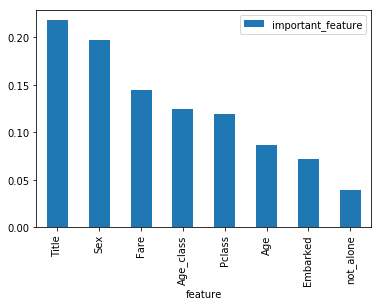

In [94]:
important_feature.plot.bar()

As we see , not_Alone didn't play a significant role in our random forest classification model. So, we need to drop this model.

In [95]:
train_df = train_df.drop("not_alone" , axis=1)
test_df = test_df.drop("not_alone" , axis=1)

### Training Random Forest Again 

In [96]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score=True)

random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, Y_train)*100, 3)

print("Improved Random Forest Accuracy: ", acc_random_forest , "%")

Improved Random Forest Accuracy:  89.787 %


In [97]:
"""
- Out-of-bag (oob) is used to estimate the generalization of accuracy
- The estimate is using a test size of the sam size as the training size
- It removes the need for a set aside of test set
"""

print("oob_score: ", round(random_forest.oob_score_,4)*100, "%")

oob_score:  80.92 %


## Hyperparameter Tuning

In [109]:
random_forest = RandomForestClassifier(criterion="gini",
                                      min_samples_leaf = 25,
                                      min_samples_split = 35,
                                      n_estimators = 10000,
                                      max_features = 'auto',
                                      oob_score = True,
                                      random_state = 1,
                                      n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
print("oob score: ", round(random_forest.oob_score_, 4)*100, "%")

oob score:  79.91 %
